## Imports and dataset loading

In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

originalDataSet = pd.read_csv('dataset.txt', sep=',',header = None)
scaler = MinMaxScaler()

def loadDataset():    
    #scaler.fit(originalDataSet.sample(frac=1).values.reshape(-1, 1))
    #dataSet = scaler.transform(originalDataSet.values) 
    
    dataSet = originalDataSet.values
    features, result = np.array(dataSet[:, :40]), np.array(dataSet[:, 40:])
    return features, result

features, result = loadDataset()


## Setting data for plotting

In [2]:
ampNumber = int(len(result[0]) / 2)
scaler.fit(result.reshape(-1, 1))
scaledResult = result #scaler.transform(result) 

gainSlices = []
lossSlices = []

for i in range(ampNumber):
    gainSlices.append(scaledResult[:, i * 2])
    lossSlices.append(scaledResult[:, i * 2 + 1])
    
gainArray = np.stack(gainSlices, axis = -1)
lossArray = np.stack(lossSlices, axis = -1)

## Plotting functions

In [20]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
def plotGroupedBoxplot():
    gainData = []
    lossData = []
    ticks    = []  
    
    for i in range(ampNumber):
        gainData.append(gainArray[:, i])
        lossData.append(lossArray[:, i])
        ticks.append("Amp {}".format(i + 1))
        
    plt.figure()
    
    gainBP = plt.boxplot(gainData, positions=np.array(range(len(gainData)))*2.0-0.3, sym = "")
    lossBP = plt.boxplot(lossData, positions=np.array(range(len(lossData)))*2.0+0.3, sym = "")
    set_box_color(gainBP, '#2C7BB6')
    set_box_color(lossBP, '#D7191C')

    plt.plot([], c='#2C7BB6', label='Gain')
    plt.plot([], c='#D7191C', label='Loss')
    plt.legend()

    plt.xticks(range(0, len(ticks) * 2, 2), ticks)
    plt.xlim(-2, len(ticks)*2)
    plt.tight_layout()
    plt.savefig('groupedBoxplot.png')

def plotGainBoxplot():
    gainData = []
    ticks    = []  
    
    for i in range(ampNumber):
        gainData.append(gainArray[:, i])
        ticks.append("Amp {}".format(i + 1))
        
    plt.figure()
    
    gainBP = plt.boxplot(gainData, positions=np.array(range(len(gainData)))*2.0+0.3, sym = "")
    set_box_color(gainBP, '#2C7BB6')

    plt.plot([], c='#2C7BB6', label='Gain')
    plt.legend()

    plt.xticks(range(0, len(ticks) * 2, 2), ticks)
    plt.xlim(-2, len(ticks)*2)
    plt.tight_layout()
    plt.savefig('gainBoxplot.png')

def plotLossBoxplot():
    lossData = []
    ticks    = []  
    
    for i in range(ampNumber):
        lossData.append(lossArray[:, i])
        ticks.append("Amp {}".format(i + 1))
        
    plt.figure()
    
    lossBP = plt.boxplot(lossData, positions=np.array(range(len(lossData)))*2.0+0.3, sym = "")
    set_box_color(lossBP, '#D7191C')

    plt.plot([], c='#D7191C', label='Loss')
    plt.legend()

    plt.xticks(range(0, len(ticks) * 2, 2), ticks)
    plt.xlim(-2, len(ticks)*2)
    plt.tight_layout()
    plt.savefig('lossBoxplot.png')


## Plotting

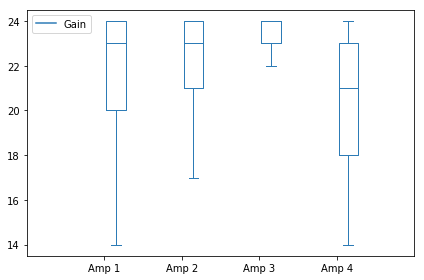

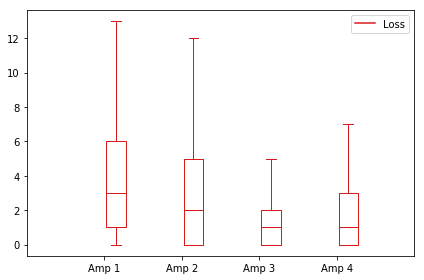

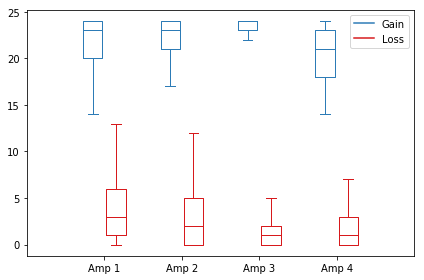

In [21]:
plotGainBoxplot()
plotLossBoxplot()
plotGroupedBoxplot()